# Task Description:
## Data Analysis:
- Start by cleaning the provided dummy data. Attached
- Dive into the cleaned data to uncover valuable insights into user preferences, such as favorite genres, average ratings, and more.

In [52]:
#Dataset Cleaning
import pandas as pd
from io import StringIO

# Load the dataset
data = """
User,Movie,Rating
Alice,Star Wars,5
Frank,The Godfather,4
Bob,Titanic,5
Carol,The Matrix,3
Dave,Inception,2
Emily,Pulp Fiction,4
Quincy,Star Wars,5
Bob,Star Wars,2
Frank,Forrest Gump,3
Alice,The Matrix,4
Paul,Titanic,4
Carol,Inception,5
Dave,Titanic,4
Emily,The Godfather,5
Alice,Inception,3
Paul,The Godfather,5
Carol,Pulp Fiction,4
Ivy,Star Wars,5
Emily,Forrest Gump,3
Quincy,The Matrix,4
Ivy,The Matrix,4
Paul,Inception,1
Bob,The Godfather,4
Frank,Star Wars,5
Ivy,Inception,3
Dave,Forrest Gump,5
Quincy,Inception,3
Karen,The Matrix,3
Leo,Titanic,4
Mia,The Godfather,5
Nina,Star Wars,5
Oscar,The Matrix,4
Sarah,Star Wars,5
Tom,Pulp Fiction,Five
Karen,Inception,5
Leo,Inception,2
Mia,Pulp Fiction,4
Nina,The Godfather,4
Oscar,Pulp Fiction,2
Sarah,Inception,4
Tom,Inception,
Victor,The Godfather,
Wendy,Pulp Fiction,4
Zane,Pulp Fiction,3.5
Uma,Titanic,5
Victor,Matrix,x
Wendy,The Matrix,3.5
Xander,Forrest Gump,5
Yara,Inception,5y
Zane,Forrest Gump,3.5
Uma,Star Wars,2?
Yara,The Matrix,N/A
Karen,Pulp Fiction,4
Leo,Forrest Gump,5
Mia,Forrest Gump,3
Nina,Forrest Gump,3
Oscar,Forrest Gump,5
Zane,Star Wars,4
"""

# Create a DataFrame
df = pd.read_csv(StringIO(data))

# Clean the data
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Display cleaned data
print(df)


      User          Movie  Rating
0    Alice      Star Wars     5.0
1    Frank  The Godfather     4.0
2      Bob        Titanic     5.0
3    Carol     The Matrix     3.0
4     Dave      Inception     2.0
5    Emily   Pulp Fiction     4.0
6   Quincy      Star Wars     5.0
7      Bob      Star Wars     2.0
8    Frank   Forrest Gump     3.0
9    Alice     The Matrix     4.0
10    Paul        Titanic     4.0
11   Carol      Inception     5.0
12    Dave        Titanic     4.0
13   Emily  The Godfather     5.0
14   Alice      Inception     3.0
15    Paul  The Godfather     5.0
16   Carol   Pulp Fiction     4.0
17     Ivy      Star Wars     5.0
18   Emily   Forrest Gump     3.0
19  Quincy     The Matrix     4.0
20     Ivy     The Matrix     4.0
21    Paul      Inception     1.0
22     Bob  The Godfather     4.0
23   Frank      Star Wars     5.0
24     Ivy      Inception     3.0
25    Dave   Forrest Gump     5.0
26  Quincy      Inception     3.0
27   Karen     The Matrix     3.0
28     Leo    

In [53]:
import pandas as pd
from io import BytesIO

with open('data.csv', 'rb') as f:
    data = f.read()

df = pd.read_csv(BytesIO(data))

print(df)


      User          Movie Rating
0    Alice      Star Wars      5
1    Frank  The Godfather      4
2      Bob        Titanic      5
3    Carol     The Matrix      3
4     Dave      Inception      2
5    Emily   Pulp Fiction      4
6   Quincy      Star Wars      5
7      Bob      Star Wars      2
8    Frank   Forrest Gump      3
9    Alice     The Matrix      4
10    Paul        Titanic      4
11   Carol      Inception      5
12    Dave        Titanic      4
13   Emily  The Godfather      5
14   Alice      Inception      3
15    Paul  The Godfather      5
16   Carol   Pulp Fiction      4
17     Ivy      Star Wars      5
18   Emily   Forrest Gump      3
19  Quincy     The Matrix      4
20     Ivy     The Matrix      4
21    Paul      Inception      1
22     Bob  The Godfather      4
23   Frank      Star Wars      5
24     Ivy      Inception      3
25    Dave   Forrest Gump      5
26  Quincy      Inception      3
27   Karen     The Matrix      3
28     Leo        Titanic      4
29     Mia

In [54]:
print(df['Rating'].dtype)

df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

df = df.dropna(subset=['Rating'])

print(df)



object
      User          Movie  Rating
0    Alice      Star Wars     5.0
1    Frank  The Godfather     4.0
2      Bob        Titanic     5.0
3    Carol     The Matrix     3.0
4     Dave      Inception     2.0
5    Emily   Pulp Fiction     4.0
6   Quincy      Star Wars     5.0
7      Bob      Star Wars     2.0
8    Frank   Forrest Gump     3.0
9    Alice     The Matrix     4.0
10    Paul        Titanic     4.0
11   Carol      Inception     5.0
12    Dave        Titanic     4.0
13   Emily  The Godfather     5.0
14   Alice      Inception     3.0
15    Paul  The Godfather     5.0
16   Carol   Pulp Fiction     4.0
17     Ivy      Star Wars     5.0
18   Emily   Forrest Gump     3.0
19  Quincy     The Matrix     4.0
20     Ivy     The Matrix     4.0
21    Paul      Inception     1.0
22     Bob  The Godfather     4.0
23   Frank      Star Wars     5.0
24     Ivy      Inception     3.0
25    Dave   Forrest Gump     5.0
26  Quincy      Inception     3.0
27   Karen     The Matrix     3.0
28     

## Basic statistics

In [55]:
# Basic statistics
average_rating = df['Rating'].mean()
max_rating = df['Rating'].max()
min_rating = df['Rating'].min()
total_users = df['User'].nunique()
total_movies = df['Movie'].nunique()

print(f"Average Rating: {average_rating:.2f}")
print(f"Maximum Rating: {max_rating}")
print(f"Minimum Rating: {min_rating}")
print(f"Total Users: {total_users}")
print(f"Total Movies: {total_movies}")


Average Rating: 3.89
Maximum Rating: 5.0
Minimum Rating: 1.0
Total Users: 19
Total Movies: 7


## User Preferences - Favorite Genres:

In [56]:
# Group by movie and calculate average rating
movie_ratings = df.groupby('Movie')['Rating'].mean().sort_values(ascending=False)

print("Average Ratings by Movie:")
print(movie_ratings)

# Identify top-rated movie
top_rated_movie = movie_ratings.idxmax()
print(f"\nTop-Rated Movie: {top_rated_movie}")


Average Ratings by Movie:
Movie
The Godfather    4.500000
Star Wars        4.428571
Titanic          4.400000
Forrest Gump     3.944444
Pulp Fiction     3.642857
The Matrix       3.642857
Inception        3.111111
Name: Rating, dtype: float64

Top-Rated Movie: The Godfather


## User Ratings Distribution:

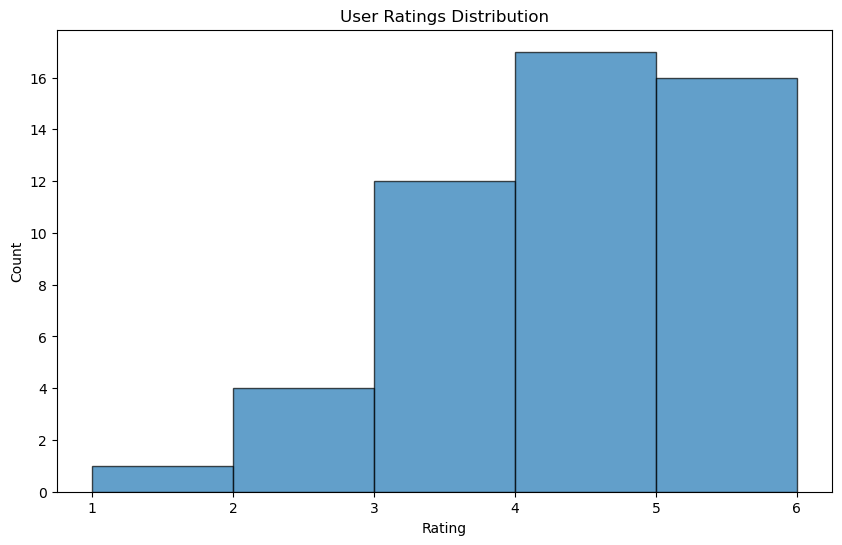

In [57]:
import matplotlib.pyplot as plt

# User Ratings Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Rating'], bins=[1, 2, 3, 4, 5, 6], edgecolor='black', alpha=0.7)
plt.title('User Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


## Algorithm Development:
- Develop a movie recommendation algorithm that takes into account user ratings.
- Implement robust measures to handle irregular or incomplete data.
- Create a fallback system that recommends popular movies if a user's data doesn't provide enough informat

In [58]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.impute import SimpleImputer

# Load the dataset
# Use your cleaned dataset or the one from the previous code
# df = ...

# Pivot the data to create a user-movie matrix
user_movie_matrix = df.pivot_table(index='User', columns='Movie', values='Rating')

# Fill missing values with the mean rating of each user
imputer = SimpleImputer(strategy='mean')
user_movie_matrix_filled = pd.DataFrame(imputer.fit_transform(user_movie_matrix), 
                                        columns=user_movie_matrix.columns, 
                                        index=user_movie_matrix.index)

# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_movie_matrix_filled)

# Convert the similarity matrix into a DataFrame
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix_filled.index, columns=user_movie_matrix_filled.index)

def get_movie_recommendations(user, n=5):
    """
    Get movie recommendations for a user based on collaborative filtering.
    """
    user_ratings = user_movie_matrix_filled.loc[user].values.reshape(1, -1)
    similarity_scores = user_similarity_df[user].values.reshape(1, -1)

    # Predict the user's ratings for all movies
    predicted_ratings = similarity_scores.dot(user_ratings.T) / similarity_scores.sum()

    # Create a DataFrame with predicted ratings
    predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=user_movie_matrix_filled.columns, index=[user])

    # Identify movies not yet rated by the user
    unrated_movies = user_movie_matrix_filled.loc[user_movie_matrix_filled.loc[user].isna()].index

    # Sort movies by predicted rating and get top recommendations
    recommendations = predicted_ratings_df.loc[:, unrated_movies].transpose().sort_values(by=user, ascending=False).head(n)

    return recommendations.index

def get_popular_movies(n=5):
    """
    Get popular movies as fallback recommendations.
    """
    popular_movies = df.groupby('Movie')['Rating'].mean().sort_values(ascending=False).head(n)
    return popular_movies.index





## User Interface:
- Design a simple Command Line Interface (CLI) where a user can input their name to receive personalized movie recommendations.
- Present these recommendations in a user-friendly format.



In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.impute import SimpleImputer

# Load the dataset
# Use your cleaned dataset or the one from the previous code
# df = ...

# Pivot the data to create a user-movie matrix
user_movie_matrix = df.pivot_table(index='User', columns='Movie', values='Rating')

# Fill missing values with the mean rating of each user
imputer = SimpleImputer(strategy='mean')
user_movie_matrix_filled = pd.DataFrame(imputer.fit_transform(user_movie_matrix), 
                                        columns=user_movie_matrix.columns, 
                                        index=user_movie_matrix.index)

# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_movie_matrix_filled)

# Convert the similarity matrix into a DataFrame
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix_filled.index, columns=user_movie_matrix_filled.index)

def get_movie_recommendations(user, n=5):
    """
    Get movie recommendations for a user based on collaborative filtering.
    """
    user_ratings = user_movie_matrix_filled.loc[user].values.reshape(-1, 1)
    similarity_scores = user_similarity_df[user].values.reshape(1, -1)

    # Predict the user's ratings for all movies
    predicted_ratings = similarity_scores.dot(user_ratings).flatten() / similarity_scores.sum()

    # Create a DataFrame with predicted ratings
    predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=user_movie_matrix_filled.columns, index=[user])

    # Identify movies not yet rated by the user
    unrated_movies = user_movie_matrix_filled.loc[user_movie_matrix_filled.loc[user].isna()].index

    # Sort movies by predicted rating and get top recommendations
    recommendations = predicted_ratings_df.loc[:, unrated_movies].transpose().sort_values(by=0, ascending=False).head(n)

    return recommendations.index


def get_popular_movies(n=5):
    """
    Get popular movies as fallback recommendations.
    """
    popular_movies = df.groupby('Movie')['Rating'].mean().sort_values(ascending=False).head(n)
    return popular_movies.index

def main():
    print("Welcome to Movie Recommender CLI!")
    user_name = input("Please enter your name: ")

    user_recommendations = get_movie_recommendations(user_name)

    if user_recommendations.empty:
        print("Sorry, we couldn't find personalized recommendations for you.")
        print("Here are some popular movies instead:")
        fallback_recommendations = get_popular_movies()
        print(fallback_recommendations)
    else:
        print(f"\nHello, {user_name}! Here are some movie recommendations for you:")
        print(user_recommendations)

if __name__ == "__main__":
    main()
